In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [2]:
in_coord = np.array([[11973,1977],
 [10671,5019],
 [13977,3009],
 [3975,7780],
 [11973,1977]])

In [3]:
class ConfigurePlanning:
    def __init__(self):
        self.index = -2
        self.size = 1
        self.planning_knowed = 0

def bezier(points, steps=10):
    n = len(points)
    b = [scipy.special.binom(n - 1, i) for i in range(n)]
    r = np.arange(n)
    
    for t in np.linspace(0, 1, steps):
        u = (np.power(t, r) * np.power(1 - t, n - r - 1) * b)
        yield t, u @ points


def define_array_planning(plan_coord, in_coord, planning):
    if planning.planning_knowed :
        pass

    elif planning.index == -2 :
        pass
    
    elif planning.index == -1 :
        (size, dim) = in_coord.shape
        planning.size = size
        for i in range(0, size-1):
            x1 = in_coord[i,0]
            y1 = in_coord[i,1]
            x2 = in_coord[i+1,0]
            y2 = in_coord[i+1,1]
    
            if planning.index == -1:
                temp = np.array([[(int) (x1 + x2)/2, (int) (y1 + y2)/2],])
                planning.index = planning.index + 1
            else:
                add = np.array([[(int) (x1 + x2)/2, (int) (y1 + y2)/2],])
                temp = np.concatenate((temp, add))
            
            add = np.array([[x2, y2],])
            temp = np.concatenate((temp, add))

        add = np.array([temp[0],])
        temp = np.concatenate((temp, add))

        i = 3
        k = 0
        
        plan_coord = np.array([p for _, p in bezier(temp[k:k+i])])

        for j in range(0,size-1):
            k = k + 2;
            add = np.array([p for _, p in bezier(temp[k:k+i])])
            plan_coord = np.concatenate((plan_coord, add))
        
#        (size, dim) = in_coord.shape
#        for i in range(0, size):
#            x = plan_coord[i,0]
#            y = plan_coord[i,1]
#            if i == 0:
#                plan_coord = np.array([[(int) x, (int)y],])
#            else :
#                add = np.array([[(int) x, (int)y],])
#                plan_coord = np.concatenate((plan_coord, add))

            
        planning.planning_knowed = 1
    return plan_coord

In [4]:
planning = ConfigurePlanning()
plan_coord  = np.array([[]])

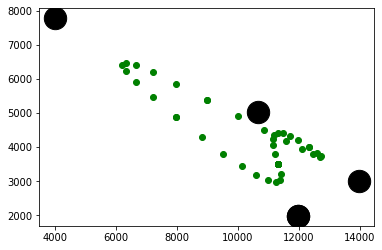

In [5]:
planning.index = -1
plan_coord = define_array_planning(plan_coord,in_coord,planning)


fig = plt.figure()
plt.scatter(in_coord[:, 0], in_coord[:, 1], s=500, c='black')
plt.scatter(plan_coord[:, 0], plan_coord[:, 1], c='green')
#plt.scatter(curve_coord[:, 0], curve_coord[:, 1], c='red')
plt.show(plt)


In [6]:
plan_coord

array([[11322.        ,  3498.        ],
       [11205.77777778,  3804.81481481],
       [11146.44444444,  4049.25925926],
       [11144.        ,  4231.33333333],
       [11198.44444444,  4351.03703704],
       [11309.77777778,  4408.37037037],
       [11478.        ,  4403.33333333],
       [11703.11111111,  4335.92592593],
       [11985.11111111,  4206.14814815],
       [12324.        ,  4014.        ],
       [12324.        ,  4014.        ],
       [12609.18518519,  3832.52469136],
       [12730.07407407,  3734.7654321 ],
       [12686.66666667,  3720.72222222],
       [12478.96296296,  3790.39506173],
       [12106.96296296,  3943.78395062],
       [11570.66666667,  4180.88888889],
       [10870.07407407,  4501.70987654],
       [10005.18518519,  4906.24691358],
       [ 8976.        ,  5394.5       ],
       [ 8976.        ,  5394.5       ],
       [ 7975.77777778,  5859.33950617],
       [ 7197.77777778,  6193.63580247],
       [ 6642.        ,  6397.38888889],
       [ 6308.44

### Seulement pour le debug / la trame

In [9]:
plan_coord

array([], shape=(1, 0), dtype=float64)

In [10]:
add = np.array([in_coord[0],])
in_coord = np.concatenate((in_coord, add))
in_coord

array([[11973,  1977],
       [10671,  5019],
       [13977,  3009],
       [ 3975,  7780],
       [11973,  1977]])

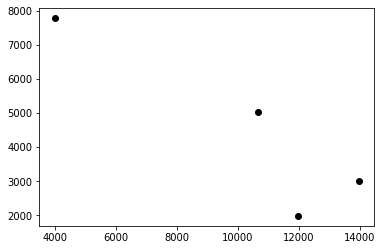

In [4]:
fig = plt.figure()
plt.scatter(in_coord[:, 0], in_coord[:, 1], c='black')
plt.show(plt)

In [15]:
(size, dim) = in_coord.shape
size

5

In [16]:
for i in range(0, size - 1):
    x1 = in_coord[i,0]
    y1 = in_coord[i,1]
    x2 = in_coord[i+1,0]
    y2 = in_coord[i+1,1]
    print("x1 {} y1 {} x2 {} y2 {}".format(x1,y1,x2,y2))
    print("OK")
        

x1 11973 y1 1977 x2 10671 y2 5019
OK
x1 10671 y1 5019 x2 13977 y2 3009
OK
x1 13977 y1 3009 x2 3975 y2 7780
OK
x1 3975 y1 7780 x2 11973 y2 1977
OK


In [56]:
plan_coord = np.array([[]])
index = -1

for i in range(0, size - 1):
    x1 = in_coord[i,0]
    y1 = in_coord[i,1]
    x2 = in_coord[i+1,0]
    y2 = in_coord[i+1,1]
    
    if index == -1:
        plan_coord = np.array([[(int) (x1 + x2)/2, (int) (y1 + y2)/2],])
        index = index + 1
    else:
        add = np.array([[(int) (x1 + x2)/2, (int) (y1 + y2)/2],])
        plan_coord = np.concatenate((plan_coord, add))
    
    add = np.array([[x2, y2],])
    plan_coord = np.concatenate((plan_coord, add))

add = np.array([plan_coord[0],])
plan_coord = np.concatenate((plan_coord, add))


print("plan_coord --> {}".format(plan_coord))

plan_coord --> [[11322.   3498. ]
 [10671.   5019. ]
 [12324.   4014. ]
 [13977.   3009. ]
 [ 8976.   5394.5]
 [ 3975.   7780. ]
 [ 7974.   4878.5]
 [11973.   1977. ]
 [11322.   3498. ]]


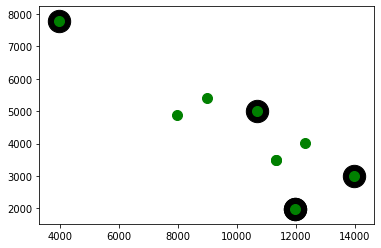

In [57]:
fig = plt.figure()
plt.scatter(in_coord[:, 0], in_coord[:, 1], s=500, c='black')
plt.scatter(plan_coord[:, 0], plan_coord[:, 1], s=100, c='green')
plt.show(plt)

In [50]:
def bezier(points, steps=10):
    n = len(points)
    b = [scipy.special.binom(n - 1, i) for i in range(n)]
    r = np.arange(n)
    
    #print("points {} binom {} r {}".format(points, b, r))
    
    for t in np.linspace(0, 1, steps):
        u = np.power(t, r) * np.power(1 - t, n - r - 1) * b
        #print("u {}".format(u))
        yield t, u @ points

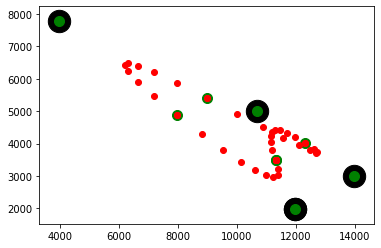

In [64]:
i = 3
k = 0
curve_coord = np.array([p for _, p in bezier(plan_coord[k:k+i])])

for j in range(0,size-1):
    k = k + 2;
    add = np.array([p for _, p in bezier(plan_coord[k:k+i])])
    curve_coord = np.concatenate((curve_coord, add))

#curve_coord

fig = plt.figure()
plt.scatter(in_coord[:, 0], in_coord[:, 1], s=500, c='black')
plt.scatter(plan_coord[:, 0], plan_coord[:, 1], s=100, c='green')
plt.scatter(curve_coord[:, 0], curve_coord[:, 1], c='red')
plt.show(plt)
